# Data Load

In [3]:
#gapminder dataset 라이브러리를 설치합니다.

#!pip install gapminder

In [4]:
#gapminder를 import하고 출력합니다.

from gapminder import gapminder

gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
gapminder.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

In [7]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


# Regression

**주어진 데이터를 활용하여 대륙명, 연도, 기대수명, 인구가 주어졌을 때 1인당 GDP를 예측하는 모델을 만드려고 한다.**

1. 주어진 빈칸에 알맞은 값을 입력하여 country 열을 뺀 새로운 데이터를 gapminder 변수에 할당 하시오.
아래와 같이 gapminder 데이터가 출력될 수 있게 하시오. (10점)

In [8]:
gapminder = gapminder.iloc[:,1:]

In [9]:
gapminder

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


2. 주어진 빈칸에 알맞은 값을 입력하여 continent 열을 one-hot encoding한 데이터를 encoded_data 변수에 할당하시오. 아래와 같이 encoded_data가 출력될 수 있게 하시오. (10점)

In [10]:
import pandas as pd

encoded_data = pd.get_dummies(gapminder, columns=['continent'])

In [11]:
encoded_data

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,1,0,0,0,0


3. 알맞은 코드를 입력하여 아래와 같이 2x2 subplot에 year, lifeExp, pop, gdpPercap에 대한 히스토그램을 그려서 출력하시오. (20점)

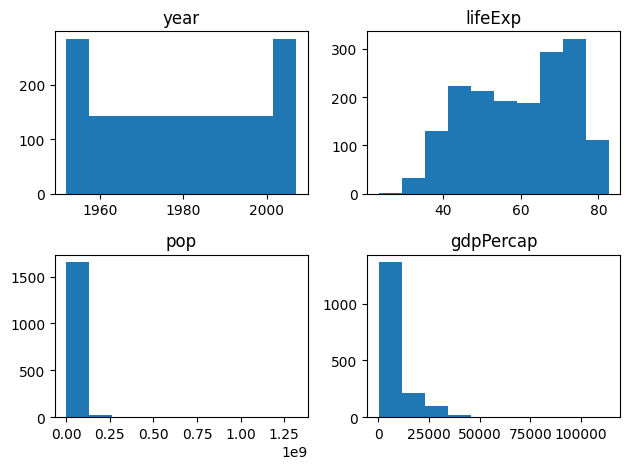

In [12]:
import matplotlib.pyplot as plt

###
plt.subplot(2,2,1)
plt.hist(encoded_data['year'])
plt.title('year')

plt.subplot(2,2,2)
plt.hist(encoded_data['lifeExp'])
plt.title('lifeExp')

plt.subplot(2,2,3)
plt.hist(encoded_data['pop'])
plt.title('pop')

plt.subplot(2,2,4)
plt.hist(encoded_data['gdpPercap'])
plt.title('gdpPercap')
###

plt.tight_layout()
plt.show()

4. pop과 gdpPercap 변수를 로그 변환을 하려 한다. 주어진 빈칸을 채워 넣어 알맞게 로그 변환 하시오. (10점)

In [13]:
import numpy as np

encoded_data['pop_log'] = np.log(encoded_data['pop'])
encoded_data['gdpPercap_log'] = np.log(encoded_data['gdpPercap'])

In [14]:
encoded_data

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,pop_log,gdpPercap_log
0,1952,28.801,8425333,779.445314,0,0,1,0,0,15.946754,6.658583
1,1957,30.332,9240934,820.853030,0,0,1,0,0,16.039154,6.710344
2,1962,31.997,10267083,853.100710,0,0,1,0,0,16.144454,6.748878
3,1967,34.020,11537966,836.197138,0,0,1,0,0,16.261154,6.728864
4,1972,36.088,13079460,739.981106,0,0,1,0,0,16.386554,6.606625
...,...,...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,1,0,0,0,0,16.036497,6.559838
1700,1992,60.377,10704340,693.420786,1,0,0,0,0,16.186160,6.541637
1701,1997,46.809,11404948,792.449960,1,0,0,0,0,16.249558,6.675129
1702,2002,39.989,11926563,672.038623,1,0,0,0,0,16.294279,6.510316


5. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 선형 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (20점)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 추출
X_df = encoded_data[['year','lifeExp','pop_log','continent_Africa','continent_Americas','continent_Asia']]
y_df = encoded_data['gdpPercap_log']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()

# 모델 학습
lin_reg.fit(X_train,y_train)

# 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"{lin_reg.__class__.__name__} MSE: {mse}") #mse를 출력하는 코드

LinearRegression MSE: 0.4184282814704041


6. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 GradientBoosting, XGBoost, LightGBM 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (30점)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train,y_train)
xgb_reg.fit(X_train,y_train)
lgb_reg.fit(X_train,y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

GradientBoostingRegressor MSE: 0.336697972776
XGBRegressor MSE: 0.3592974282188313
LGBMRegressor MSE: 0.3361552630717745


# 보너스

1. 데이터 전처리 시간에 배운 것을 활용하여 데이터를 전처리하고, 전처리한 데이터를 가지고 LGBMRegressor()로 학습하시오. (시도 시 10점, 기존 모델에 비해 성능 향상 시 10점)

In [80]:
from gapminder import gapminder
gapminder

,continent,year,lifeExp,pop,gdpPercap,totalGdp
0,Asia,1952,28.801,8425333,779.445314,6.567086e+09
1,Asia,1957,30.332,9240934,820.853030,7.585449e+09
2,Asia,1962,31.997,10267083,853.100710,8.758856e+09
3,Asia,1967,34.020,11537966,836.197138,9.648014e+09
4,Asia,1972,36.088,13079460,739.981106,9.678553e+09
...,...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306,6.508241e+09
1700,Africa,1992,60.377,10704340,693.420786,7.422612e+09
1701,Africa,1997,46.809,11404948,792.449960,9.037851e+09
1702,Africa,2002,39.989,11926563,672.038623,8.015111e+09


In [81]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap,totalGdp
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1.704000e+03
mean,1979.50000,59.474439,2.960121e+07,7215.327081,1.868096e+11
std,17.26533,12.917107,1.061579e+08,9857.454543,7.140297e+11
min,1952.00000,23.599000,6.001100e+04,241.165876,5.278469e+07
25%,1965.75000,48.198000,2.793664e+06,1202.060309,5.895295e+09
50%,1979.50000,60.712500,7.023596e+06,3531.846988,2.234330e+10
75%,1993.25000,70.845500,1.958522e+07,9325.462346,1.057441e+11
max,2007.00000,82.603000,1.318683e+09,113523.132900,1.293446e+13


In [82]:
gapminder.duplicated().sum()

0

In [83]:
gapminder.isnull().sum()

continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
totalGdp     0
dtype: int64

In [84]:
gapminder['totalGdp'] = gapminder['pop']*gapminder['gdpPercap']
gapminder

,continent,year,lifeExp,pop,gdpPercap,totalGdp
0,Asia,1952,28.801,8425333,779.445314,6.567086e+09
1,Asia,1957,30.332,9240934,820.853030,7.585449e+09
2,Asia,1962,31.997,10267083,853.100710,8.758856e+09
3,Asia,1967,34.020,11537966,836.197138,9.648014e+09
4,Asia,1972,36.088,13079460,739.981106,9.678553e+09
...,...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306,6.508241e+09
1700,Africa,1992,60.377,10704340,693.420786,7.422612e+09
1701,Africa,1997,46.809,11404948,792.449960,9.037851e+09
1702,Africa,2002,39.989,11926563,672.038623,8.015111e+09


In [85]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap,totalGdp
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1.704000e+03
mean,1979.50000,59.474439,2.960121e+07,7215.327081,1.868096e+11
std,17.26533,12.917107,1.061579e+08,9857.454543,7.140297e+11
min,1952.00000,23.599000,6.001100e+04,241.165876,5.278469e+07
25%,1965.75000,48.198000,2.793664e+06,1202.060309,5.895295e+09
50%,1979.50000,60.712500,7.023596e+06,3531.846988,2.234330e+10
75%,1993.25000,70.845500,1.958522e+07,9325.462346,1.057441e+11
max,2007.00000,82.603000,1.318683e+09,113523.132900,1.293446e+13


In [86]:
gapminder['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [91]:
encoded_data = pd.get_dummies(gapminder,columns=['continent'])

In [92]:
encoded_data

,year,lifeExp,pop,gdpPercap,totalGdp,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,6.567086e+09,0,0,1,0,0
1,1957,30.332,9240934,820.853030,7.585449e+09,0,0,1,0,0
2,1962,31.997,10267083,853.100710,8.758856e+09,0,0,1,0,0
3,1967,34.020,11537966,836.197138,9.648014e+09,0,0,1,0,0
4,1972,36.088,13079460,739.981106,9.678553e+09,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,6.508241e+09,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,7.422612e+09,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,9.037851e+09,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,8.015111e+09,1,0,0,0,0


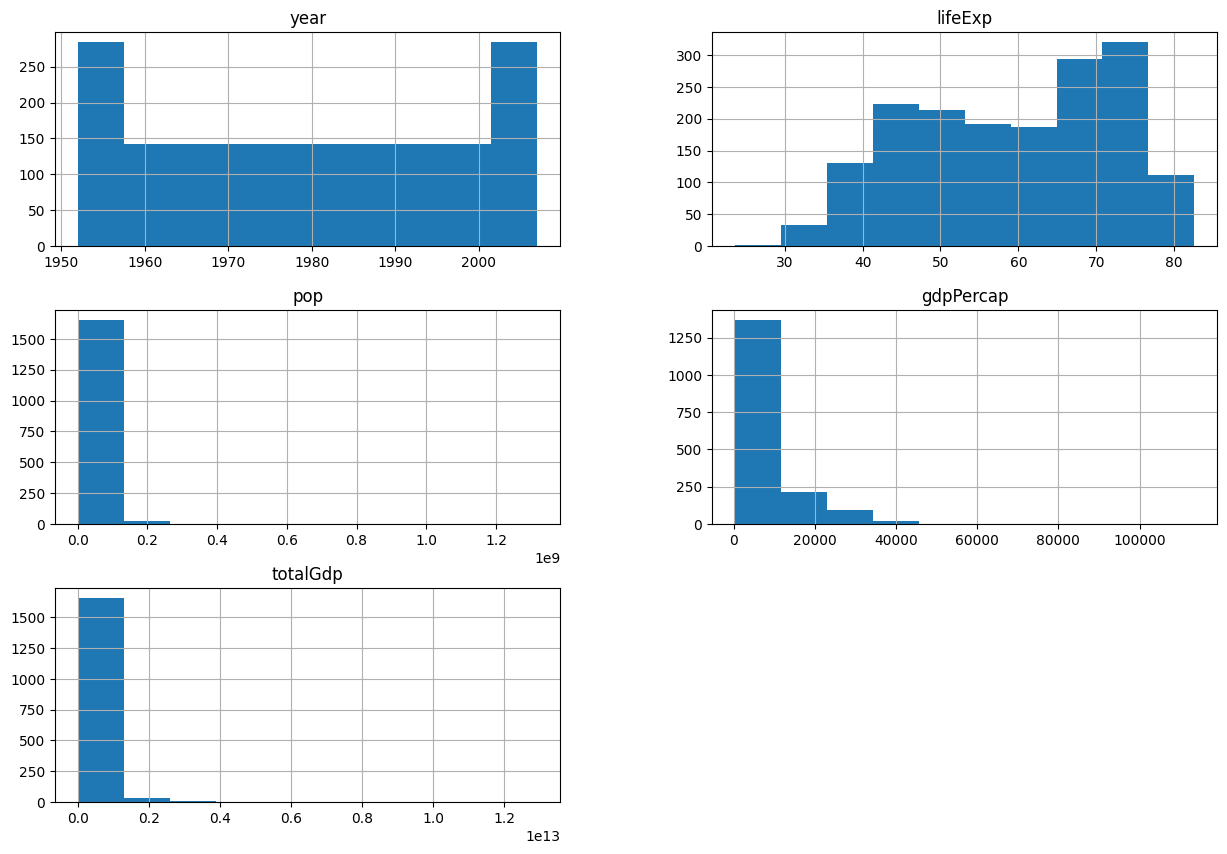

In [99]:
encoded_data.iloc[:,:5].hist(figsize=(15,10))
plt.show()

In [100]:
encoded_data['pop_log']=np.log(encoded_data['pop'])
encoded_data['gdpPercap_log']=np.log(encoded_data['gdpPercap'])
encoded_data['totalGdp_log']=np.log(encoded_data['totalGdp'])

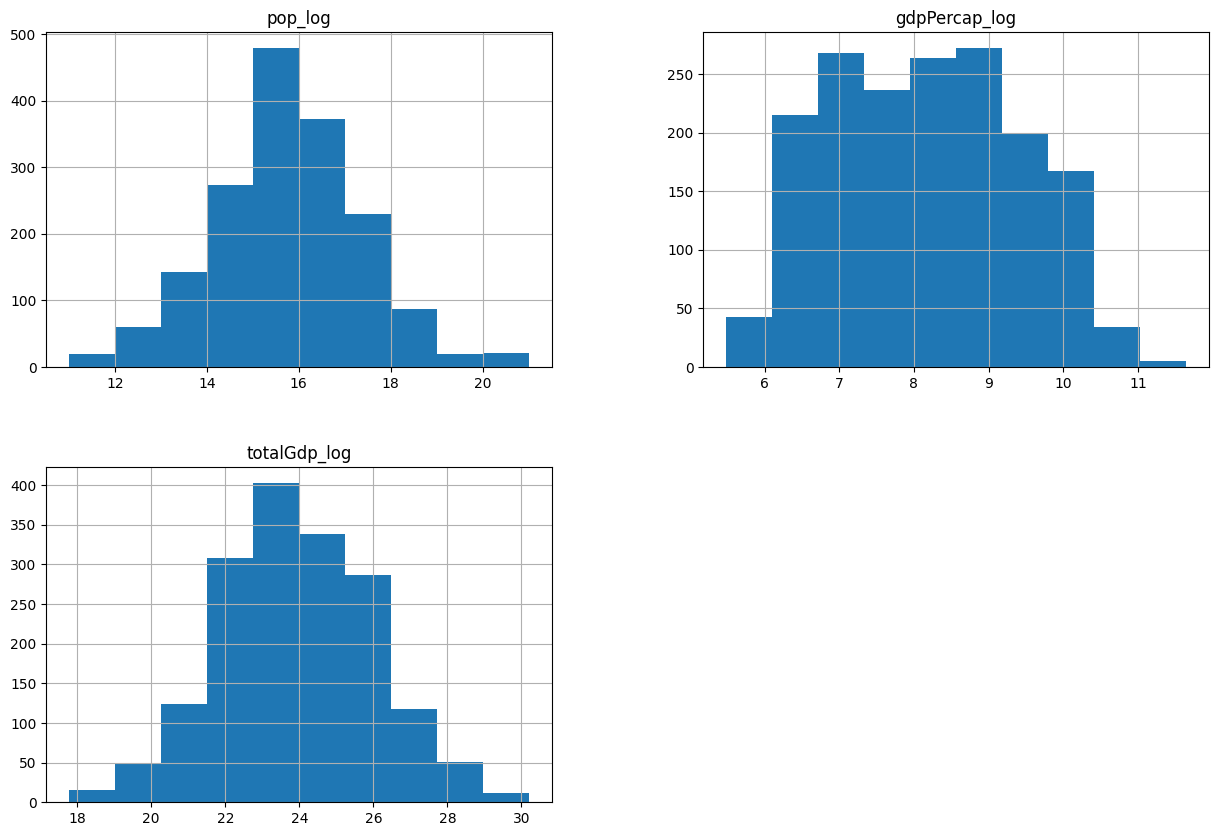

In [101]:
encoded_data[['pop_log','gdpPercap_log','totalGdp_log']].hist(figsize=(15,10))
plt.show()

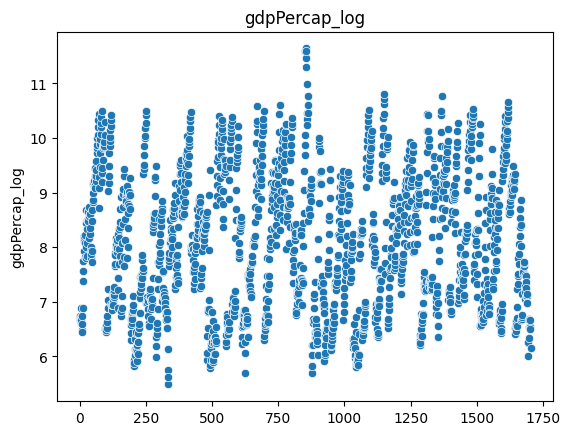

In [103]:
plt.title('gdpPercap_log')
sns.scatterplot(x=encoded_data['gdpPercap_log'].index,y=encoded_data['gdpPercap_log'])
plt.show()

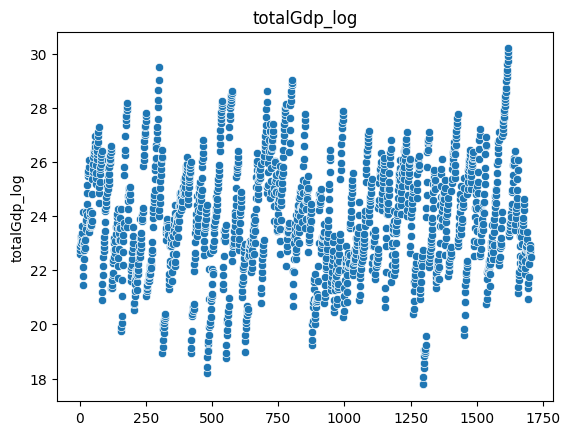

In [105]:
plt.title('totalGdp_log')
sns.scatterplot(x=encoded_data['totalGdp_log'].index,y=encoded_data['totalGdp_log'])
plt.show()

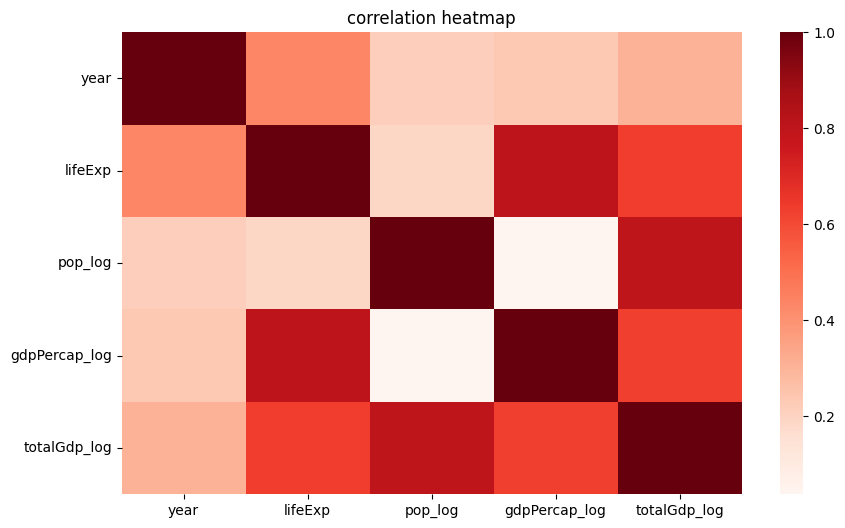

In [106]:
corr = encoded_data[['year','lifeExp','pop_log','gdpPercap_log','totalGdp_log']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds')
plt.title("correlation heatmap")
plt.show()

In [124]:
X_df_1 = encoded_data[['year','lifeExp','pop_log','totalGdp_log','continent_Africa','continent_Americas','continent_Asia']]
y_df_1 = encoded_data['gdpPercap_log']

In [129]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_df_1,y_df_1,test_size=0.2,random_state=42)

lgbm_reg = LGBMRegressor()

lgbm_reg.fit(X_train_1,y_train_1)
y_pred_1 = lgbm_reg.predict(X_test_1)

mse = mean_squared_error(y_test_1, y_pred_1)
print(f"{lgbm_reg.__class__.__name__} MSE: {mse}")

LGBMRegressor MSE: 0.03541871621300645


In [134]:
X_df_2 = encoded_data[['year','lifeExp','totalGdp_log','continent_Africa','continent_Americas','continent_Asia']]
y_df_2 = encoded_data['gdpPercap_log']
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_df_2,y_df_2,test_size=0.2,random_state=42)

lgbm_reg = LGBMRegressor()

lgbm_reg.fit(X_train_2,y_train_2)
y_pred_2 = lgbm_reg.predict(X_test_2)

mse = mean_squared_error(y_test_2, y_pred_2)
print(f"{lgbm_reg.__class__.__name__} MSE: {mse}")

LGBMRegressor MSE: 0.3318818255867665


**MSE가 낮게 나옴! -> 혹시 다중공선성이 있는것이 아닌지 확인해 볼 필요가 있다**


**<다중공선성 확인>**
1. 산포도 및 상관계수 확인
- 두 독립변수의 산포도를 보았을 때, 상관관계가 너무 높으면 다중공선성이 있다고 판단
- 상관계수가 0.9를 넘는다면 다중공선성의 문제가 있다고 할 수 있음
2. 허용/공차(tolerance)를 확인
- tolerance란 한개의 독립변수를 종속변수로 나머지 독립변수를 독립변수로 하는 회귀분석을 했을 때 나오는 R-squred 값을 이용, 1-R^2를 의미한다.
- 만약 R^2가 1이면 독립변수 간에 심각한 상관관게가 있다는 것을 의미하며, tolerance는 이 경우 0이 될 것이다.
- 따라서 tolerance가 0이면 완벽한 상관성을 의미하며 다중공선성이 심각하다는 것을 의미한다.
3. 분산팽창지수(VIF: Variance Inflation Factor)
- VIF = 1/tolerance = 1/(1-R^2)
- VIF가 크다는 것은 다중공선성이 크다는 의미
- 일반적으로 10보다 크면 문제가 있다고 판단한다.
- 이는 연속형 변수의 경우 행당한다고 보아야하는데 만약 더미변수의 VIF가 3이상이라면 이 경우 다중공선성을 의심해보야한다.
4. 상태지수(Condition Index)
- 100이상이면 심각한 다중공선성이 있다고 판단한다.
- 거의 잘 사용하지 않는다.

2. 선형 회귀 모델을 이용하여 회귀분석을 진행하고, 그 의미에 대해서 직접 해석해보시오. (시도 시 10점)

In [117]:
import statsmodels.api as sm

In [131]:
X_train_1 = sm.add_constant(X_train_1)
X_test_1 = sm.add_constant(X_test_1)


model = sm.OLS(y_train_1, X_train_1)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          gdpPercap_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.323e+29
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:48:42   Log-Likelihood:                 40502.
No. Observations:                1363   AIC:                        -8.099e+04
Df Residuals:                    1355   BIC:                        -8.095e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                6.75e-14   1.16

이 경우 R^2 값이 1이 나온다! -> 심각한 상관관계가 있음을 확인 할 수 있음!

In [141]:
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)


model = sm.OLS(y_train_2, X_train_2)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          gdpPercap_log   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     515.7
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:59:35   Log-Likelihood:                -1425.2
No. Observations:                1363   AIC:                             2864.
Df Residuals:                    1356   BIC:                             2901.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 20.6922      2

In [139]:
X_df_2['year_0'] = X_df_2['year'] - X_df_2['year'].mean()
X_df_2['lifeExp_0'] = X_df_2['lifeExp'] - X_df_2['lifeExp'].mean()
X_df_2['totalGdp_log_0'] = X_df_2['totalGdp_log'] - X_df_2['totalGdp_log'].mean()
X_df_2

<ipython-input-139-1db655b828bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df_2['year_0'] = X_df_2['year'] - X_df_2['year'].mean()
<ipython-input-139-1db655b828bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df_2['lifeExp_0'] = X_df_2['lifeExp'] - X_df_2['lifeExp'].mean()
<ipython-input-139-1db655b828bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,year,lifeExp,totalGdp_log,continent_Africa,continent_Americas,continent_Asia,year_0,lifeExp_0,totalGdp_log_0
0,1952,28.801,22.605336,0,0,1,-27.5,-30.673439,-1.319564
1,1957,30.332,22.749498,0,0,1,-22.5,-29.142439,-1.175403
2,1962,31.997,22.893331,0,0,1,-17.5,-27.477439,-1.031569
3,1967,34.020,22.990018,0,0,1,-12.5,-25.454439,-0.934882
4,1972,36.088,22.993178,0,0,1,-7.5,-23.386439,-0.931722
...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,22.596335,1,0,0,7.5,2.876561,-1.328565
1700,1992,60.377,22.727797,1,0,0,12.5,0.902561,-1.197103
1701,1997,46.809,22.924687,1,0,0,17.5,-12.665439,-1.000213
1702,2002,39.989,22.804594,1,0,0,22.5,-19.485439,-1.120306


In [142]:
X_df_mean_centered = X_df_2.iloc[:,3:]
y_df = encoded_data['gdpPercap_log']

X_train,X_test,y_train,y_test = train_test_split(X_df_mean_centered,y_df,test_size=0.2,random_state=24)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


model = sm.OLS(y_train, X_train)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          gdpPercap_log   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     541.9
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:59:57   Log-Likelihood:                -1395.5
No. Observations:                1363   AIC:                             2805.
Df Residuals:                    1356   BIC:                             2841.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.3325      0

### 해석을 적는 란

해석: *평균 중심화를 진행했을 때 기준*

1. R^2 값은 0.706으로 상당히 높게 측정되었다. 따라서 이 회귀식은 원래의 자료를 잘 설명한다고 할 수 있다.
2. 'year','lifeExp','totalGdp_log','continent_Africa','continent_Americas','continent_Asia' 변수의 값이 평균값일 때 'gdpPercap_log'의 값은 8.3325이다.
3. 'year','lifeExp','totalGdp_log','continent_Americas','continent_Asia' 변수의 값이 평균값일 때, 'continent_Africa'가 1일 때 'gdpPercap_log'의 값이 0.1613만큼 감소한다.
4. 'year','lifeExp','totalGdp_log','continent_Africa','continent_Asia' 변수의 값이 평균값일 때, 'continent_Americas'가 1일 때 'gdpPercap_log'의 값이 0.1468만큼 감소한다.
5. 'year','lifeExp','totalGdp_log','continent_Africa','continent_Americas' 변수의 값이 평균값일 때, 'continent_Asia'가 1일 때 'gdpPercap_log'의 값이 0.3409만큼 감소한다.
6. 다른 변수값이 평균값 일 때 year가 1년 증가 할 때 'gdpPercap_log'의 값이 0.0086만큼 감소한다.
7. 다른 변수값이 평균값 일 때 lifeExp가 1년 증가 할 때 'gdpPercap_log'의 값이 0.0666만큼 증가한다.
8. 다른 변수값이 평균값 일 때 totalGdp가 1 증가 할 때 'gdpPercap_log'의 값이 0.1318만큼 증가한다.
9. 상수항과 변수 모두 p-value가 0.05보다 작음으로 모두 유의하다고 할 수 있다.